In [1]:
# 과거 코드 필요
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True) # 불필요한 열 버리기
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

tidf = pd.read_csv("C:/Users/sgsgk/Documents/machine-learning-example-data/titanic_train.csv")
yti = tidf['Survived']
xti = tidf.drop('Survived', axis=1)
xti = transform_features(xti)

X_train, X_test, y_train, y_test = train_test_split(xti, yti, test_size=0.2, random_state=11)

lr = LogisticRegression(solver='liblinear')

lr.fit(X_train, y_train)
pred = lr.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[108  10]
 [ 14  47]]


IndexError: Replacement index 3 out of range for positional args tuple

In [55]:
#thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresolds):
    for custom_thresold in thresholds:
        binarizer = Binarizer(threshold=custom_thresold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:', custom_thresold)
        get_clf_eval(y_test, custom_predict)

In [35]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestype='-', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid; plt.show()

precision_recall_curve_plot(y_test, lr.predict_proba(X_test)[:1])


ValueError: Found input variables with inconsistent numbers of samples: [154, 1]

In [18]:
thresholds.shape[0]

AttributeError: 'list' object has no attribute 'shape'

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))

In [4]:
# Binarizer 객체 사용해보기
from sklearn.preprocessing import Binarizer

x = [[1,-1,2],
     [2,0,0],
     [0,1.1,1.2]]

bina = Binarizer(threshold=1.1)
print(bina.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

dia = pd.read_csv("C:/Users/sgsgk/Documents/machine-learning-example-data/diabetes.csv")
print(dia['Outcome'].value_counts())
dia.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [51]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [33]:
x = dia.iloc[:, :-1]
y = dia.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=156, stratify=y)
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[87 13]
 [22 32]]
정확도:0.7727, 정밀도:0.7111, 재현율:0.5926, F1:0.6465, AUC:0.8083


In [34]:
pred_proba

array([0.04170088, 0.20916548, 0.1648553 , 0.51654585, 0.08160291,
       0.6937585 , 0.71303659, 0.18560577, 0.18711175, 0.20066838,
       0.627868  , 0.48368699, 0.07644254, 0.34852211, 0.2634072 ,
       0.14253554, 0.71542903, 0.34134705, 0.03127337, 0.71617331,
       0.35074138, 0.30480967, 0.07257066, 0.33017332, 0.30050899,
       0.14751866, 0.84922974, 0.65841009, 0.25147334, 0.79316655,
       0.20205382, 0.22287343, 0.17973543, 0.24995722, 0.17611474,
       0.5790851 , 0.28692163, 0.54661045, 0.74864759, 0.63226006,
       0.48471001, 0.29950942, 0.59456013, 0.21644262, 0.35041756,
       0.05716275, 0.71566551, 0.13284909, 0.50012047, 0.31775368,
       0.32252184, 0.81025888, 0.83222401, 0.11311221, 0.18899309,
       0.37458812, 0.1065327 , 0.38931029, 0.34620112, 0.4423774 ,
       0.22797863, 0.72700302, 0.31269088, 0.60787099, 0.27543091,
       0.15392969, 0.22645245, 0.7107608 , 0.19029713, 0.72374415,
       0.1230779 , 0.33719984, 0.1489479 , 0.45161862, 0.64885

In [36]:
# plot 그리기 실패..

In [37]:
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


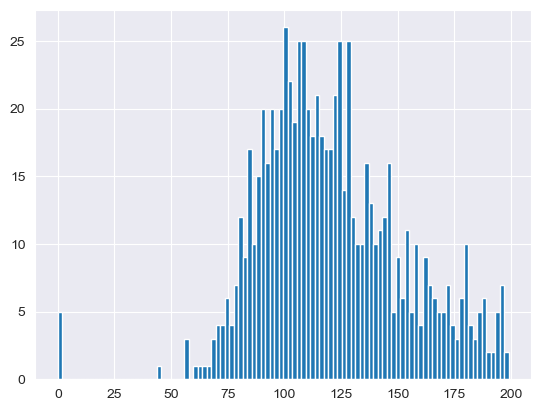

In [39]:
plt.hist(dia['Glucose'], bins=100)
plt.show()

In [42]:
# 0이 몇퍼센트의 비율로 존재하는지 확인
zero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

total_count = dia['Glucose'].count()

for feature in zero_features:
    zero_count = dia[dia[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count,
                                                100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [49]:
mean_zero_features = dia[zero_features].mean() # 요거는 그냥 시리즈 형태로 나온다
dia[zero_features] = dia[zero_features].replace(0, mean_zero_features) # 0을 평균으로 바꾸기

x = dia.iloc[:, :-1]
y = dia.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,
                                                    random_state=156, stratify=y)
# stratify : 원본 데이터에서 label의 비율를 맞추어서 train test set으로 나누어주는 기능

lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도:0.7987, 정밀도:0.7674, 재현율:0.6111, F1:0.6804, AUC:0.8433


In [56]:
# 적절한 임계값 찾기
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.48, 0.50]
pred_proba = lr.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

임계값: 0.3


C:\Users\sgsgk\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').